# Machine Learning (CS535): Assignment 3
## Neural Networks
#### Name: Abdul Rafay
#### Roll Number: 24100173

### Instructions


*   The aim of this assignment is to learn machine learning tools - Keras, Sklearn and PyTorch.
*   You must use the Python programming language.
*   You can add as many code/markdown cells as required.
*   ALL cells must be run (and outputs visible) in order to get credit for your work.
*   Please use procedural programming style and comment your code thoroughly.
*   There are three parts of this assignment. The import statemnets for the required libraries is already given.
*   **Carefully read the submission instructions and plagiarism policy.**
*   Deadline to submit this assignment is 17th November 2022, 11:55pm on LMS.
*   TAs will not be allowed to debug your code or answer how to solve a question.

### Submission Instructions

You should submit both your notebook file (.ipynb), python script (.py) and dataset (.csv) on LMS.
Please name your files Name_RollNo_Assignment3. Zip these files in a folder and name
the folder Name_RollNo_Assignment3. If you don't know how to save .ipynb as .py see
[this](https://i.stack.imgur.com/L1rQH.png). Failing to submit any one of them might result in the reduction of marks.

### Plagiarism Policy

The code $\color{red}{\text{MUST}}$ be done independently. Any plagiarism or cheating of work from others
or the internet will be immediately referred to the DC. If you are confused about what
constitutes plagiarism, it is your responsibility to consult with the instructor or the TA
in a timely manner. **PLEASE DO NOT LOOK AT ANYONE ELSE'S CODE
NOR DISCUSS IT WITH THEM.**


### Introduction
In this assignment, you will be implementing neural network for the provided dataset using Sklearn, Keras and PyTorch. A description of the problem statement is given at the start of each part. 

Have fun!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# inline plotting
%matplotlib inline

## Part 1: Feature Extraction
You are given [MNIST audio dataset](https://drive.google.com/file/d/1imgBIVbgtGPV31r64UghSK3161Qfumsm/view?usp=sharing) which contains audio recordings, where speakers say digits (0 to 9) out loud. Use the following line of code to read the audio file:
```python
audio, sr = librosa.load(file_path, sr=16000)
```
You need to extract MFCC features for each audio file, the feature extraction code is give (you can read 
about MFCC from [here](https://link.springer.com/content/pdf/bbm:978-3-319-49220-9/1.pdf)). Length of each feature vector will be 13. You need to save all the feature vectors in a csv file with ith column representing ith feature, and each row representing an audio file. Add a 'y' column to the csv file and append the labels column at the end. Your csv file should look like this:

| x1 | x2 | x3 | x4 | x5 | x6 | x7 | x8 | x9 | x10 | x11 | x12 | x13 | y |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| -11.347038 | -8.070062 | -0.915299 | 6.859546 | 8.754656 | -3.440287 | -5.738487 | -21.853178 | -9.859462 | 3.584948 | -2.661195	| 1.023747 | -4.574332 | 2 |

Split the dataset into train and test with 80:20 ratio. Print the train data size and test data size.

In [3]:
from glob import glob
import python_speech_features as mfcc
import librosa
from sklearn.model_selection import train_test_split

In [10]:
def get_MFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

In [11]:
dataset_path = '../mnist_digit/mnist_audio/data'

# inside the folder, there are 60 folders, each containing multiple recordings of digits 0-9 by one person, so each different folder is a different person

files = glob(dataset_path + '/*/*.wav')

# sanity check
print(len(files))

# each file will have 13 features, and one label. there are 30000 files, so the shape of the dataset will be (30000, 14)
dataset = np.zeros((len(files), 14))

# iterate over all the files and extract features
for i, file in enumerate(files):
    # read the audio file
    audio, sr = librosa.load(file, sr=16000)
    # get the MFCC features
    features = get_MFCC(audio, sr)
    # get the label
    label = int(file.split('/')[-1].split('_')[0])
    # store the features and the label in the dataset
    dataset[i, :-1] = features
    dataset[i, -1] = label

    # print the progress
    if ((i+1) % 1000) == 0:
        print("Completed: ", i+1)

30000
Completed:  1000
Completed:  2000
Completed:  3000
Completed:  4000
Completed:  5000
Completed:  6000
Completed:  7000
Completed:  8000
Completed:  9000
Completed:  10000
Completed:  11000
Completed:  12000
Completed:  13000
Completed:  14000
Completed:  15000
Completed:  16000
Completed:  17000
Completed:  18000
Completed:  19000
Completed:  20000
Completed:  21000
Completed:  22000
Completed:  23000
Completed:  24000
Completed:  25000
Completed:  26000
Completed:  27000
Completed:  28000
Completed:  29000
Completed:  30000


In [12]:
# sanity checks
print(dataset.shape)
print(dataset[0])

# saving the dataset np array
np.save("dataset.npy", dataset)

(30000, 14)
[ -9.36472164   2.39150358  -5.52165487   8.89938855 -14.00232172
  -4.15499333 -27.66484791   5.41279463 -11.41988478 -12.25803603
  -8.09658403   1.82871085   1.45925187   9.        ]


In [4]:
# load the dataset np array
dataset = np.load("dataset.npy")

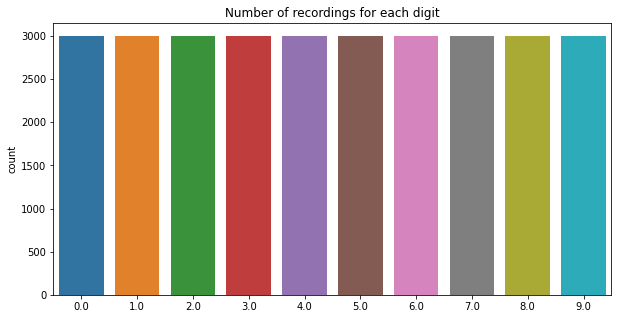

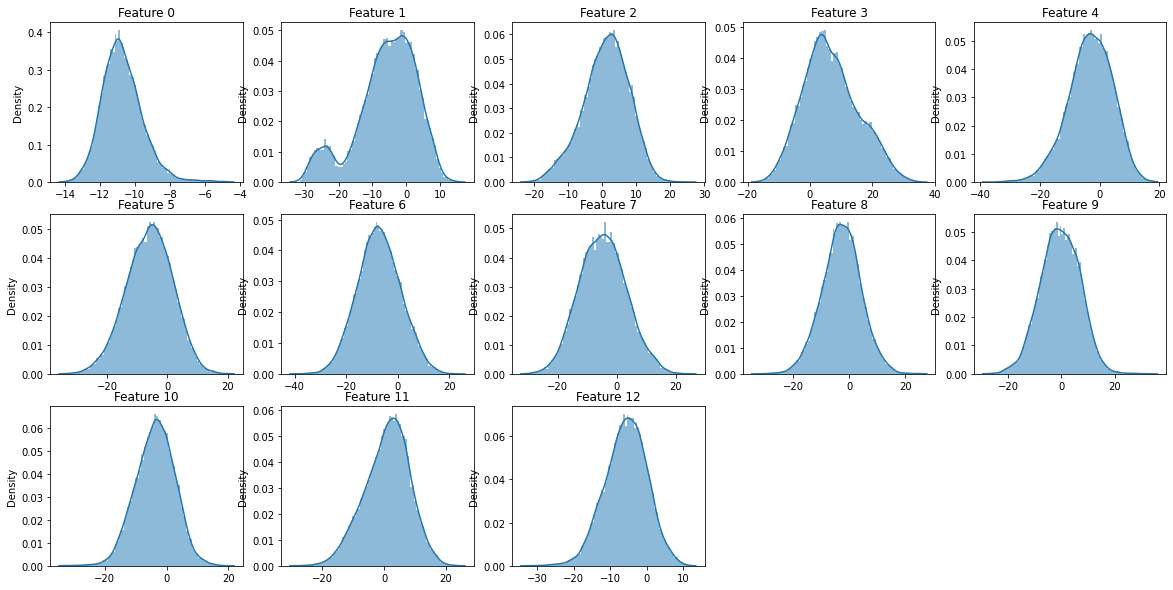

In [13]:
# data exploration
# let's see how many recordings are there for each digit
plt.figure(figsize=(10, 5))
sns.countplot(x=dataset[:, -1])
plt.title('Number of recordings for each digit')
plt.show()

# let's see how the features are distributed, distribution of all 13 features.
plt.figure(figsize=(20, 10))
for i in range(13):
    plt.subplot(3, 5, i+1)
    sns.histplot(dataset[:, i], kde=True, stat="density", linewidth=0)
    plt.title('Feature {}'.format(i))
plt.show()


The number of recordings is the same for each digit, and as can be observed, all features are almost normally distributed. The distribution of all the features is pretty much on the same scale as well, therefore we dont need to normalize and standardize the data.

In [49]:
# split the dataset into train and test sets
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(dataset[:, :-1], dataset[:, -1], test_size=0.2, random_state=69)

## Part 2: Neural Network Implementation

### Task 2.1:  Scikit-learn

In this part you will use the [Scikit-learn](https://scikit-learn.org/stable/index.html) to implement the [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and apply it to the MNIST audio dataset (provided in part 1). Split the training dataset into train and evaluation data with 90:10 ratio. Run evaluation on X_eval while training on X_train. Tune the hyperparameters to get the best possible classification accuracy. You need to report accuracy, recall, precision and F1 score on the test dataset and print the confusion matrix.

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [51]:
# split the training data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(data_X_train, data_y_train, test_size=0.1, random_state=69)

Training the model...


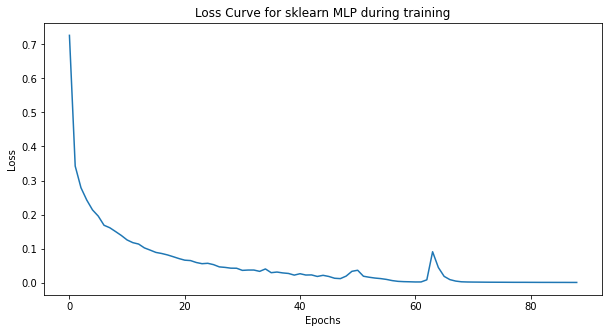

In [52]:
# create the model
sk_model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), alpha=0.0001, solver='adam', verbose=False, random_state=21)

# train the model
print("Training the model...")
sk_model.fit(X_train, y_train)

# plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(sk_model.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for sklearn MLP during training')
plt.show()

Predicting for the evaluation set...
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       224
         1.0       0.94      0.96      0.95       248
         2.0       0.90      0.95      0.92       222
         3.0       0.97      0.93      0.95       244
         4.0       0.95      0.97      0.96       241
         5.0       0.99      0.97      0.98       236
         6.0       1.00      1.00      1.00       235
         7.0       0.96      0.97      0.97       253
         8.0       0.98      0.98      0.98       243
         9.0       0.96      0.96      0.96       254

    accuracy                           0.96      2400
   macro avg       0.96      0.96      0.96      2400
weighted avg       0.96      0.96      0.96      2400



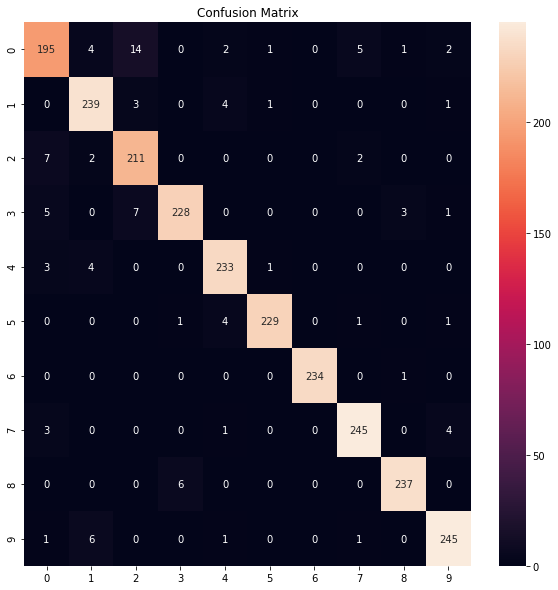

In [53]:
# predict for the test set
print("Predicting for the evaluation set...")
y_pred = sk_model.predict(X_eval)

# print the classification report
print(classification_report(y_eval, y_pred))

# plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_eval, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

### Task 2.2: Tensorflow Keras

In this part you will use the [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to implement the [Neural Network](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/) and apply it to the MNIST audio dataset (provided in part 1). Split the training dataset into train and evaluation data with 90:10 ratio. Run evaluation on X_eval while training on X_train. Tune the hyperparameters to get the best possible classification accuracy. You need to report accuracy, recall, precision and F1 score on the test dataset and print the confusion matrix.

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [134]:
# Set the parameters accordingly
LEARNING_RATE = 0.0003
BATCH_SIZE = 256
EPOCHS = 50

In [135]:
# split the training data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(data_X_train, data_y_train, test_size=0.1, random_state=70)

Training the model...
Epoch 1/50
85/85 [==============================] - 5s 36ms/step - loss: 1.3221 - accuracy: 0.5723 - val_loss: 0.6090 - val_accuracy: 0.7829
Epoch 2/50
85/85 [==============================] - 2s 28ms/step - loss: 0.4917 - accuracy: 0.8217 - val_loss: 0.4220 - val_accuracy: 0.8429
Epoch 3/50
85/85 [==============================] - 2s 23ms/step - loss: 0.3787 - accuracy: 0.8629 - val_loss: 0.3543 - val_accuracy: 0.8629
Epoch 4/50
85/85 [==============================] - 1s 17ms/step - loss: 0.3302 - accuracy: 0.8794 - val_loss: 0.3121 - val_accuracy: 0.8850
Epoch 5/50
85/85 [==============================] - 1s 16ms/step - loss: 0.2931 - accuracy: 0.8939 - val_loss: 0.2894 - val_accuracy: 0.8929
Epoch 6/50
85/85 [==============================] - 2s 21ms/step - loss: 0.2669 - accuracy: 0.9045 - val_loss: 0.2627 - val_accuracy: 0.9013
Epoch 7/50
85/85 [==============================] - 2s 22ms/step - loss: 0.2462 - accuracy: 0.9129 - val_loss: 0.2646 - val_accuracy

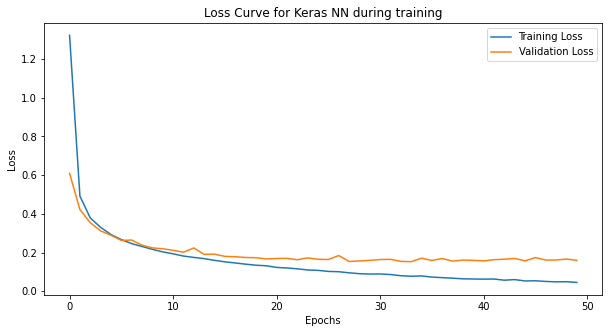

In [136]:
# create the model
keras_model = Sequential()
keras_model.add(Dense(100, input_dim=13, activation='relu'))
keras_model.add(Dense(100, activation='relu'))
keras_model.add(Dense(100, activation='relu'))
keras_model.add(Dense(100, activation='relu'))
keras_model.add(Dense(10, activation='softmax'))

# compile the model
keras_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=LEARNING_RATE), metrics=['accuracy'])

# train the model
print("Training the model...")
keras_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_eval, y_eval))

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(keras_model.history.history['loss'], label='Training Loss')
plt.plot(keras_model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Keras NN during training')
plt.legend()
plt.show()

Predicting for the eval set...
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       228
         1.0       0.91      0.92      0.92       251
         2.0       0.86      0.92      0.89       231
         3.0       0.93      0.91      0.92       244
         4.0       0.97      0.99      0.98       227
         5.0       0.98      0.98      0.98       231
         6.0       0.99      0.99      0.99       235
         7.0       0.97      0.98      0.98       236
         8.0       0.95      0.96      0.95       248
         9.0       0.95      0.93      0.94       269

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400



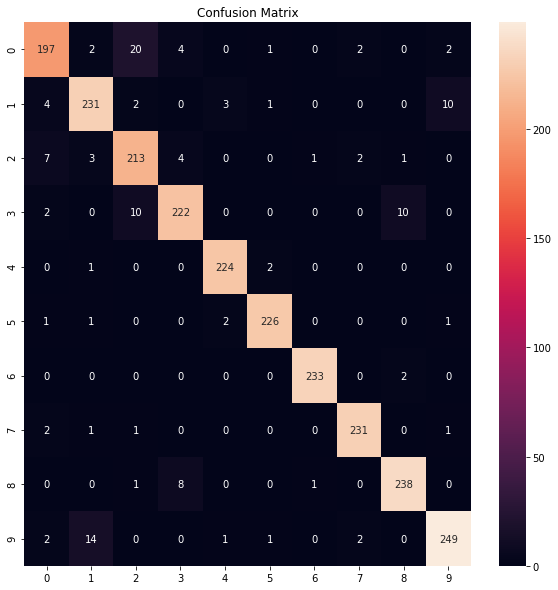

In [137]:
# predict for the test set
print("Predicting for the eval set...")

y_pred = keras_model.predict(X_eval)
y_pred = np.argmax(y_pred, axis=1)

# print the classification report
print(classification_report(y_eval, y_pred))

# plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_eval, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

### Task 2.3: Pytorch 

In this part you will use the [Keras](https://pytorch.org/docs/stable/nn.html) to implement the [Neural Network](https://medium.com/analytics-vidhya/a-simple-neural-network-classifier-using-pytorch-from-scratch-7ebb477422d2) and apply it to the MNIST audio dataset (provided in part 1). Split the training dataset into train and evaluation data with 90:10 ratio. Run evaluation on X_eval while training on X_train. You need to use DataLoader to generate batches of data. Tune the hyperparameters to get the best possible classification accuracy. You need to report training loss, training accuracy, validation loss and validation accuracy after each epoch in the following format:
```
Epoch 1/2
loss: 78.67749792151153 - accuracy: 0.6759259259259259 - val_loss: 6.320814955048263 - val_accuracy: 0.7356481481481482
Epoch 2/2
loss: 48.70551285566762 - accuracy: 0.7901234567901234 - val_loss: 6.073690168559551 - val_accuracy: 0.7791666666666667
```
You need to report accuracy, recall, precision and F1 score on the test dataset and print the confusion matrix.

In [120]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score

In [121]:
# split the training data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(data_X_train, data_y_train, test_size=0.1, random_state=71)

In [122]:
class Data(Dataset):
    def __init__(self, X_train, y_train):
        # Code here
        self.X_train = X_train
        self.y_train = y_train
        self.len     = len(X_train)

    def __getitem__(self, index):
        # Code here
        return self.X_train[index], self.y_train[index]
    
    def __len__(self):
        # Code here
        return self.len

In [123]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Code here
        self.fc1 = nn.Linear(13, 100)   # input layer
        self.fc2 = nn.Linear(100, 100)  # hidden layer 1
        self.fc3 = nn.Linear(100, 100)  # hidden layer 2
        self.fc4 = nn.Linear(100, 10)   # output layer

        self.relu = nn.ReLU()

    def forward(self, x):
        # Code here
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [124]:
# Set the parameters accordingly
LEARNING_RATE = 0.0003
BATCH_SIZE = 128
EPOCHS = 50

In [125]:
# Set the loss function and optimizer accordingly
loss_function = nn.CrossEntropyLoss()
# Initialize the model
pytorch_model = NeuralNetwork()
optimizer = torch.optim.Adam(pytorch_model.parameters(), lr=LEARNING_RATE)

Training the model...
Epoch 1/50
loss : 0.47767 - accuracy : 0.82639 - val_loss : 0.49003 - val_accuracy : 0.81500
Epoch 2/50
loss : 0.38306 - accuracy : 0.85625 - val_loss : 0.39126 - val_accuracy : 0.85083
Epoch 3/50
loss : 0.33706 - accuracy : 0.87481 - val_loss : 0.34530 - val_accuracy : 0.86375
Epoch 4/50
loss : 0.30415 - accuracy : 0.88903 - val_loss : 0.31545 - val_accuracy : 0.88125
Epoch 5/50
loss : 0.27863 - accuracy : 0.89935 - val_loss : 0.28891 - val_accuracy : 0.89333
Epoch 6/50
loss : 0.26937 - accuracy : 0.89866 - val_loss : 0.28177 - val_accuracy : 0.89750
Epoch 7/50
loss : 0.26157 - accuracy : 0.90065 - val_loss : 0.27565 - val_accuracy : 0.88958
Epoch 8/50
loss : 0.23068 - accuracy : 0.91806 - val_loss : 0.24374 - val_accuracy : 0.91292
Epoch 9/50
loss : 0.23515 - accuracy : 0.91329 - val_loss : 0.25366 - val_accuracy : 0.90083
Epoch 10/50
loss : 0.21012 - accuracy : 0.92458 - val_loss : 0.22980 - val_accuracy : 0.92083
Epoch 11/50
loss : 0.19870 - accuracy : 0.92829

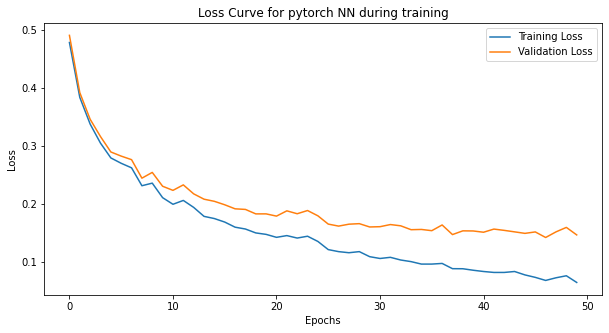

In [126]:
# Create the dataloader
train_data = Data(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# dataloader for evaluation set
eval_data = Data(X_eval, y_eval)
eval_loader = DataLoader(eval_data, batch_size=BATCH_SIZE, shuffle=True)

train_loss_curve = []
train_acc_curve = []
eval_loss_curve = []
eval_acc_curve = []

# Train the model
print("Training the model...")
for epoch in range(EPOCHS):
    for X, y in train_loader:
        
        X = X.to(torch.float32)
        y = y.to(torch.long)

        optimizer.zero_grad()

        y_pred = pytorch_model(X)
        loss = loss_function(y_pred, y)

        loss.backward()
        optimizer.step()

    # find the training loss and training accuracy for the entire training set
    y_pred = pytorch_model(torch.tensor(X_train).to(torch.float32))
    train_loss = loss_function(y_pred, torch.tensor(y_train).to(torch.long)).item()
    y_pred = torch.argmax(y_pred, dim=1).detach().numpy()
    train_acc = accuracy_score(y_train, y_pred)

    # find the validation loss and validation accuracy for the entire validation set
    y_pred = pytorch_model(torch.tensor(X_eval).to(torch.float32))
    val_loss = loss_function(y_pred, torch.tensor(y_eval).to(torch.long)).item()
    y_pred = torch.argmax(y_pred, dim=1).detach().numpy()
    val_acc = accuracy_score(y_eval, y_pred)

    train_loss_curve.append(train_loss)
    train_acc_curve.append(train_acc)
    eval_loss_curve.append(val_loss)
    eval_acc_curve.append(val_acc)

    # Print the details for the epoch
    print(f"Epoch {epoch+1}/{EPOCHS}")
    print(f"loss : {train_loss:.5f} - accuracy : {train_acc:.5f}", end=' - ')
    print(f"val_loss : {val_loss:.5f} - val_accuracy : {val_acc:.5f}")


# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(train_loss_curve, label='Training Loss')
plt.plot(eval_loss_curve, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for pytorch NN during training')
plt.legend()
plt.show()

Predicting for the eval set...
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       266
         1.0       0.91      0.97      0.94       226
         2.0       0.93      0.88      0.90       262
         3.0       0.92      0.94      0.93       191
         4.0       0.98      0.98      0.98       247
         5.0       0.98      0.97      0.98       254
         6.0       1.00      1.00      1.00       243
         7.0       0.96      0.97      0.97       259
         8.0       0.96      0.98      0.97       221
         9.0       0.95      0.89      0.92       231

    accuracy                           0.95      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.95      0.95      0.95      2400



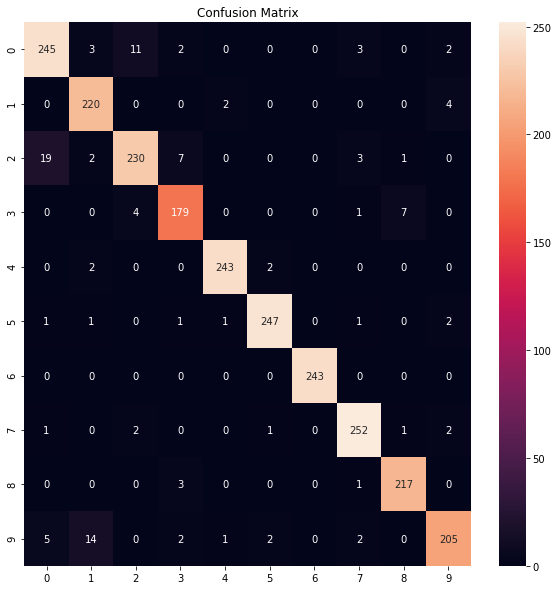

In [127]:
# predict for the eval set
print("Predicting for the eval set...")

y_pred = pytorch_model(torch.tensor(X_eval).to(torch.float32))
y_pred = torch.argmax(y_pred, dim=1).detach().numpy()

# print the classification report
print(classification_report(y_eval, y_pred))

# plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_eval, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [138]:
# comparison of all models for the test set.

sklearn_pred = sk_model.predict(data_X_test)
keras_pred   = np.argmax(keras_model.predict(data_X_test), axis=1)
torch_pred   = pytorch_model(torch.tensor(data_X_test).to(torch.float32))
torch_pred   = torch.argmax(torch_pred, dim=1).detach().numpy()

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91       576
         1.0       0.94      0.94      0.94       618
         2.0       0.92      0.91      0.92       597
         3.0       0.95      0.93      0.94       609
         4.0       0.98      0.97      0.98       607
         5.0       0.97      0.98      0.98       596
         6.0       0.99      1.00      0.99       607
         7.0       0.97      0.97      0.97       594
         8.0       0.96      0.98      0.97       602
         9.0       0.95      0.94      0.94       594

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       576
         1.0       0.94      0.93      0.93       618
         2.0       0.89      0.91      0.90       597
         3.0       0.92 

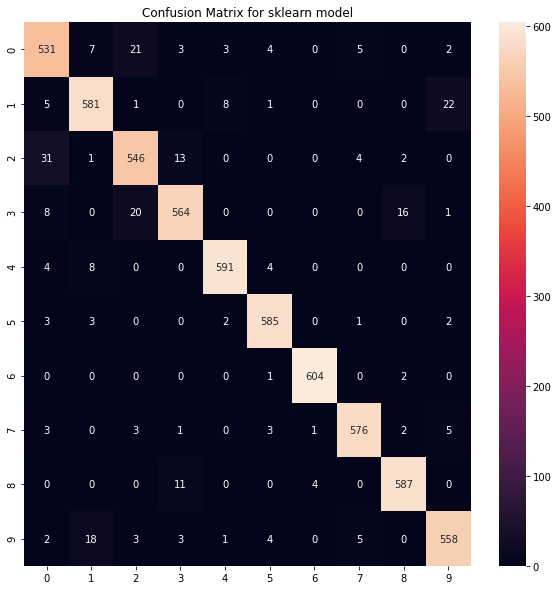

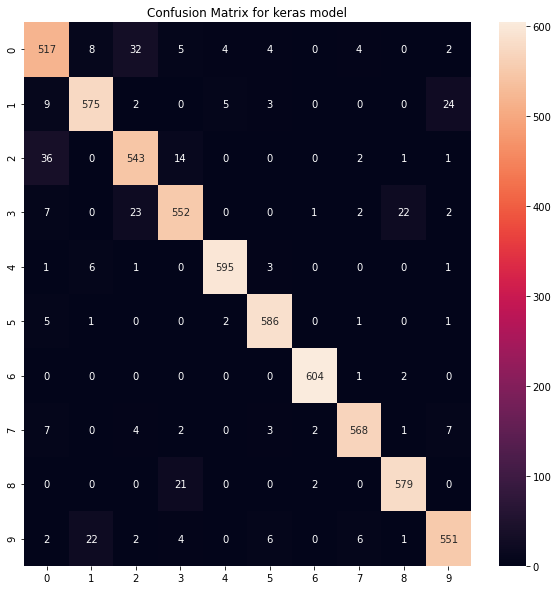

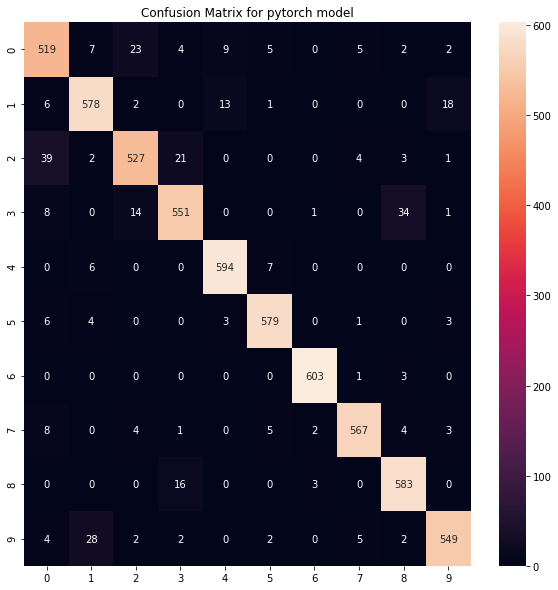

In [139]:
# print the classification report.
print(classification_report(data_y_test, sklearn_pred))
print(classification_report(data_y_test, keras_pred))
print(classification_report(data_y_test, torch_pred))

# plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(data_y_test, sklearn_pred), annot=True, fmt='d')
plt.title('Confusion Matrix for sklearn model')
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(data_y_test, keras_pred), annot=True, fmt='d')
plt.title('Confusion Matrix for keras model')
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(data_y_test, torch_pred), annot=True, fmt='d')
plt.title('Confusion Matrix for pytorch model')
plt.show()

## Part 3: Theoretical

**Q1**: Compare the tools you used above. State the advantages and disadvantages.

Sklearn:
Sklearn has a very black box model where most of the implementation details are hidden away from the user, and it is very easy to get a model up and running. This also implies that the models are not very customizable and the user has very little control over the model. The models are also not very efficient and are not very fast. The models are also not very scalable and are not very good for large datasets. The models are also not very good for deep learning tasks. And therefore should be used for Machine Learning tasks other than deep learning.

Keras:
Keras is a very high level API which is very easy to use. With Keras, it is very fast to get a model up and running. It is also very customizable and the user has a lot of control over the model. The complexity is also very low, since it is based on tensor flow and abstracts away the complicated calculations to tensor flow. The models are also very efficient and are very fast.

PyTorch:
PyTorch is a very low level API which is very customizable and the user has a lot of control over the model. The models are very customizable and the user has a lot of control over the model. Models in pytorch use a very object oriented approach. Since it is relatively a low level API, it is a bit more difficult to use than Keras. However, it provides a better support and speed for huge datasets compared to both sklearn and pytorch.

**Q2**: What is the purpose of the data loader in PyTorch?

Data loader helps with large datasets where it provides a parallelilaztion solution for loading large datasets. It also helps with shuffling the data and batching the data. It also helps with the data augmentation. 